In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL', 'stooq', start, end)
df.head()

df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08
1,2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2,2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
3,2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
4,2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07


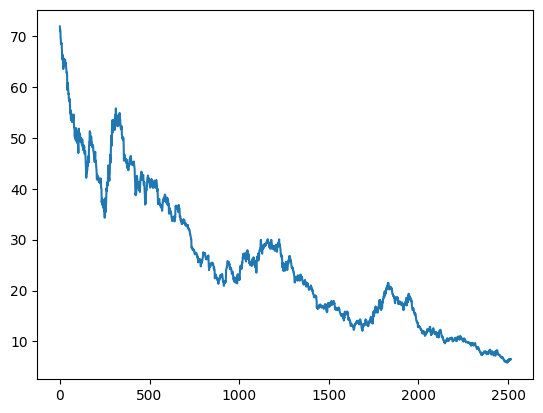

In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 =df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2511    6.953343
2512    6.937091
2513    6.921914
2514    6.908978
2515    6.897006
Name: Close, Length: 2516, dtype: float64

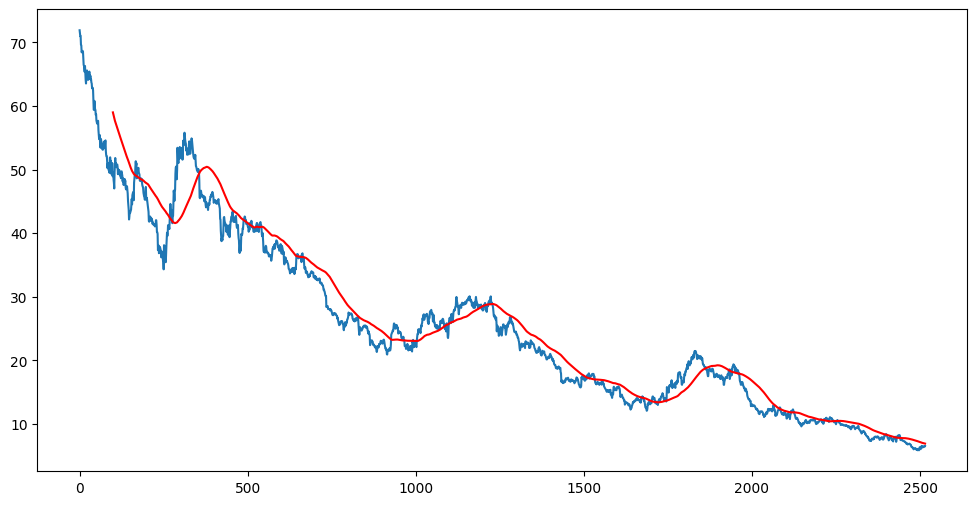

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2511    7.532251
2512    7.517503
2513    7.502498
2514    7.487859
2515    7.473319
Name: Close, Length: 2516, dtype: float64

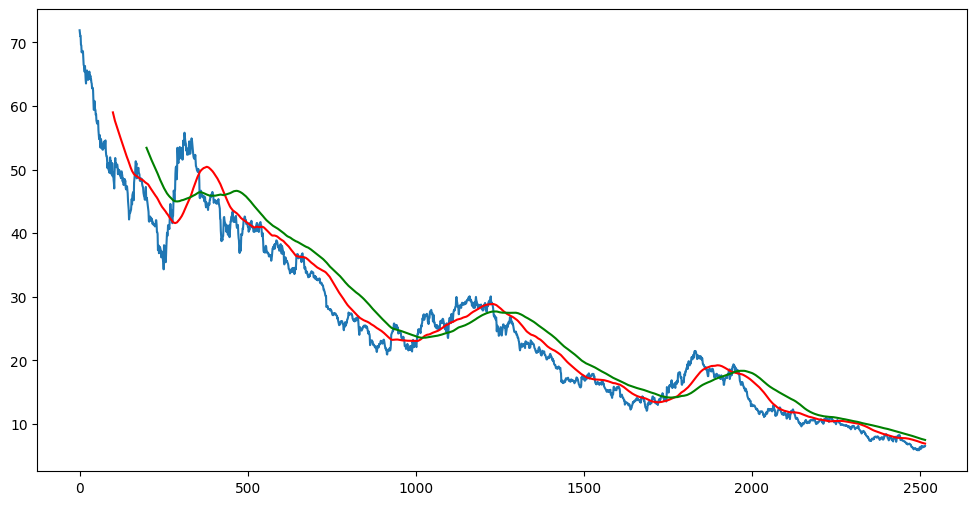

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2516, 5)

In [ ]:
#Splitting data into Training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [ ]:
data_training.head()

,Close
0,71.9176
1,71.3983
2,70.9755
3,71.0034
4,69.6226


In [ ]:
data_testing.head()

,Close
1761,16.8635
1762,16.3442
1763,15.6512
1764,15.8198
1765,15.7560


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[1.        ],
       [0.9913238 ],
       [0.98425987],
       ...,
       [0.06725934],
       [0.06889166],
       [0.07662054]])

In [ ]:
x_train = []
y_train = []

for i in range (100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
# ML Model

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))
#Dense layer is to connect all the layers


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#other class of loss are categorical cross propriant and binary cross entropy that is for classification purpose
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
52/52 [==============================] - 22s 300ms/step - loss: 0.0294
Epoch 2/50
52/52 [==============================] - 15s 283ms/step - loss: 0.0059
Epoch 3/50
52/52 [==============================] - 19s 367ms/step - loss: 0.0042
Epoch 4/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0043
Epoch 5/50
52/52 [==============================] - 15s 293ms/step - loss: 0.0043
Epoch 6/50
52/52 [==============================] - 15s 291ms/step - loss: 0.0036
Epoch 7/50
52/52 [==============================] - 15s 291ms/step - loss: 0.0037
Epoch 8/50
52/52 [==============================] - 15s 285ms/step - loss: 0.0033
Epoch 9/50
52/52 [==============================] - 16s 303ms/step - loss: 0.0033
Epoch 10/50
52/52 [==============================] - 18s 350ms/step - loss: 0.0030
Epoch 11/50
52/52 [==============================] - 20s 394ms/step - loss: 0.0029
Epoch 12/50
52/52 [==============================] - 19s 369ms/step - loss: 0.0032
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
1761,16.8635
1762,16.3442
1763,15.6512
1764,15.8198
1765,15.7560


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,13.7261
1,13.8437
2,13.7481
3,13.7241
4,13.6723


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[5.04456778e-01],
       [5.11985572e-01],
       [5.05865226e-01],
       [5.04328737e-01],
       [5.01012482e-01],
       [5.07459333e-01],
       [4.88253224e-01],
       [4.90929275e-01],
       [4.79437620e-01],
       [5.09373542e-01],
       [5.31070043e-01],
       [5.27497706e-01],
       [5.35154542e-01],
       [5.43009841e-01],
       [5.32862613e-01],
       [5.36947112e-01],
       [5.15692351e-01],
       [5.06825531e-01],
       [4.94629652e-01],
       [5.01332584e-01],
       [4.76313426e-01],
       [4.50910145e-01],
       [4.33355762e-01],
       [4.27677156e-01],
       [4.29015181e-01],
       [4.14149653e-01],
       [3.98061335e-01],
       [4.01057488e-01],
       [4.22382671e-01],
       [4.68784631e-01],
       [4.55954950e-01],
       [4.75737243e-01],
       [4.84732104e-01],
       [4.87484979e-01],
       [4.70180275e-01],
       [4.68720611e-01],
       [4.62715501e-01],
       [4.71588723e-01],
       [4.80013803e-01],
       [4.75737243e-01],


In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 82ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([7.05314266e-01, 6.72068492e-01, 6.27702380e-01, 6.38496213e-01,
       6.34411714e-01, 6.48579420e-01, 6.46914891e-01, 6.51511553e-01,
       6.60640857e-01, 6.75448767e-01, 6.46025008e-01, 6.28086502e-01,
       6.67215748e-01, 6.85660015e-01, 6.90320697e-01, 6.67471829e-01,
       6.74168359e-01, 7.01741930e-01, 6.85211872e-01, 7.57977417e-01,
       7.78329491e-01, 7.76677766e-01, 7.84526662e-01, 7.71953063e-01,
       7.75653440e-01, 7.84910784e-01, 7.49424297e-01, 7.30211786e-01,
       7.28675297e-01, 7.38060682e-01, 6.63316908e-01, 6.59232409e-01,
       6.81383454e-01, 6.93252830e-01, 6.93124789e-01, 7.01357808e-01,
       6.83169623e-01, 7.22939072e-01, 7.66588156e-01, 7.70032452e-01,
       7.54654761e-01, 7.93265442e-01, 7.91037533e-01, 8.07951713e-01,
       8.18803165e-01, 8.33098912e-01, 8.26267939e-01, 8.66792829e-01,
       8.19443369e-01, 8.64052758e-01, 8.87413789e-01, 8.97625037e-01,
       8.68201277e-01, 8.58310131e-01, 8.55115515e-01, 8.80134673e-01,
      

In [ ]:
y_predicted

array([[0.596871  ],
       [0.60339296],
       [0.60915303],
       [0.61287427],
       [0.61395305],
       [0.61232543],
       [0.60858005],
       [0.6034465 ],
       [0.5977594 ],
       [0.5923904 ],
       [0.5882831 ],
       [0.5854435 ],
       [0.5832695 ],
       [0.58198   ],
       [0.5821099 ],
       [0.5840077 ],
       [0.587229  ],
       [0.59125364],
       [0.5960281 ],
       [0.6011205 ],
       [0.6071495 ],
       [0.61470395],
       [0.62388533],
       [0.63444597],
       [0.6455138 ],
       [0.6561624 ],
       [0.6657516 ],
       [0.6731487 ],
       [0.67738307],
       [0.67822945],
       [0.6761663 ],
       [0.6707693 ],
       [0.66218317],
       [0.65131706],
       [0.6393776 ],
       [0.62750083],
       [0.6167705 ],
       [0.60778546],
       [0.6016855 ],
       [0.59955126],
       [0.6017753 ],
       [0.607854  ],
       [0.6172381 ],
       [0.6290195 ],
       [0.64231217],
       [0.6562854 ],
       [0.6702815 ],
       [0.683

In [ ]:
scaler.scale_

array([0.06402036])

In [ ]:
scale_factor = 1/(scaler.scale_)
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor


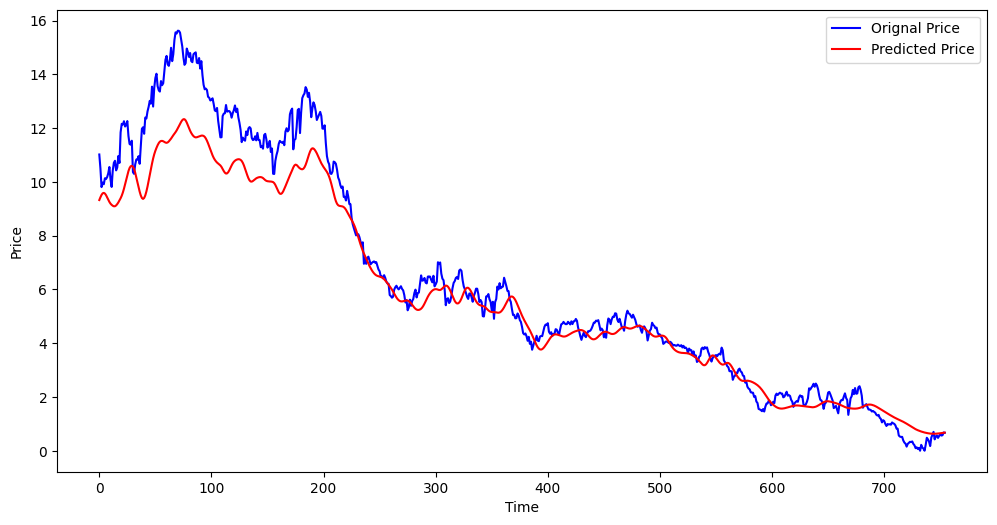

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()